<a href="https://colab.research.google.com/github/utk468/rice_classification/blob/main/rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
muratkokludataset_rice_image_dataset_path = kagglehub.dataset_download('muratkokludataset/rice-image-dataset')

print('Data source import complete.')


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-image-dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [ ]:
data_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [ ]:

img_size = (224, 224)
batch_size = 32

# Data Augmentation with 80-20 train-test split
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)


val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)


history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)


loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4500s 2s/step - accuracy: 0.7483 - loss: 0.6209 - val_accuracy: 0.9307 - val_loss: 0.1875 - learning_rate: 0.0010
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4409s 2s/step - accuracy: 0.9366 - loss: 0.1823 - val_accuracy: 0.9801 - val_loss: 0.0611 - learning_rate: 0.0010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4409s 2s/step - accuracy: 0.9544 - loss: 0.1370 - val_accuracy: 0.9708 - val_loss: 0.0816 - learning_rate: 0.0010
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4399s 2s/step - accuracy: 0.9619 - loss: 0.1116 - val_accuracy: 0.9863 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4400s 2s/step - accuracy: 0.9725 - loss: 0.0877 - val_accuracy: 0.9821 - val_loss: 0.0513 - learning_rate: 0.0010
469/469 ━━━━━━━━━━━━━━━━━━━━ 399s 850ms/step - accuracy: 0.9862 - loss: 0.0421
Validation Loss: 0.04124746099114418
Validation Accuracy: 0.98580002784729


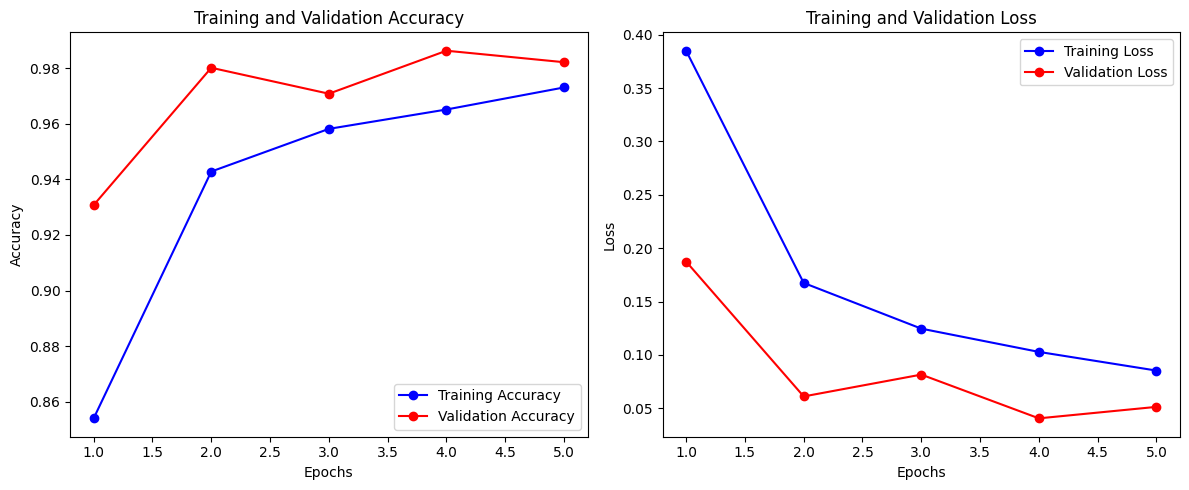

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()